# Projeto COVID-19

Este projeto visa analisar o histórico médico de indivíduos para determinar se estão em um grupo de risco para o COVID-19. Embora a pandemia já tenha passado, optei por prosseguir com este projeto, pois acredito que uma solução baseada em inteligência artificial poderia oferecer benefícios significativos tanto para o público em geral quanto para os profissionais da saúde. Ao fornecer essas informações, poderíamos direcionar recursos e atenção de forma mais eficaz, visando o bem-estar e a prevenção de doenças.


Para acessar a base de dados o link é: https://www.kaggle.com/datasets/meirnizri/covid19-dataset/data

In [51]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

In [52]:
#importando a base de dados
covid_df = pd.read_csv('Covid Data.csv')
display(covid_df)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [53]:
# cria um csv com os primeiros 1000 dados
#covid_df.head(1000).to_csv('covid1000.csv')

#### Nesta base de dados temos o seguinte padrão, 1 significa 'sim', 2 significa 'não' e 97, 98 ou 99 são dados ausentes, tendo isso em mente vou varrer todos os dados e ver como estão distribuidos os meus valores na tabela

In [54]:
colunas = covid_df.columns

for coluna in colunas:
    print(covid_df[coluna].value_counts())
    print('-'*50)

USMER
2    662903
1    385672
Name: count, dtype: int64
--------------------------------------------------
MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64
--------------------------------------------------
SEX
1    525064
2    523511
Name: count, dtype: int64
--------------------------------------------------
PATIENT_TYPE
1    848544
2    200031
Name: count, dtype: int64
--------------------------------------------------
DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64
--------------------------------------------------
INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int6

#### As colunas INTUBED, PREGNANT e ICU possuem muitos valores faltando (97), por isso preencher esses valores com algum padrão pode prejudicar nosso modelo, então decidi excluir as colunas

In [55]:
colunas_excl = ['INTUBED', 'PREGNANT', 'ICU']

for coluna in colunas_excl:
    covid_df = covid_df.drop(coluna, axis=1)
print(covid_df.shape)

(1048575, 18)


#### Para as outras colunas que possuem poucos valores faltando irei apenas excluir a linha, pois nossa base de dados é bem grande então esses poucos dados não farão falta

In [56]:
colunas_linhas = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CARDIOVASCULAR']

for coluna in colunas_linhas:
    a = covid_df.loc[covid_df[coluna]==98, coluna]
    a = a.index   
    covid_df = covid_df.drop(a, axis=0)

for coluna in colunas_linhas:
    a = covid_df.loc[covid_df[coluna]==99, coluna]
    a = a.index   
    covid_df = covid_df.drop(a, axis=0)
    
print(covid_df.shape)

(1025152, 18)


In [57]:
colunas = covid_df.columns

for coluna in colunas:
    print(covid_df[coluna].value_counts())
    print('-'*50)

USMER
2    658255
1    366897
Name: count, dtype: int64
--------------------------------------------------
MEDICAL_UNIT
12    591811
4     307177
6      37868
9      37384
3      18660
8      10097
10      7543
5       7062
11      5556
7        871
13       813
2        159
1        151
Name: count, dtype: int64
--------------------------------------------------
SEX
1    513216
2    511936
Name: count, dtype: int64
--------------------------------------------------
PATIENT_TYPE
1    833253
2    191899
Name: count, dtype: int64
--------------------------------------------------
DATE_DIED
9999-99-99    950438
06/07/2020       984
07/07/2020       981
13/07/2020       969
16/06/2020       965
               ...  
27/02/2021         1
26/02/2021         1
20/02/2021         1
11/02/2021         1
22/04/2021         1
Name: count, Length: 395, dtype: int64
--------------------------------------------------
PNEUMONIA
2    887553
1    137599
Name: count, dtype: int64
------------------------

#### O campo DATE_DIED, trás informações de data da morte dos pacientes ou se for 9999-99-99 significa que o paciente está vivo, como esse campo parece que não vai ajudar muito o modelo, irei excluir

In [58]:
covid_df = covid_df.drop('DATE_DIED', axis=1)

### Precisamos excluir outras colunas que não vão ajudar a decidir se o paciente é do grupo de risco ou não, então vou excluir as colunas:
    - MEDICAL_UNIT: Tipo de instituição do Sistema Único de Saúde que prestou o atendimento.

In [59]:
covid_df = covid_df.drop('MEDICAL_UNIT', axis=1)
print(covid_df.shape)

(1025152, 16)


#### Depois de excluir as colunas que não serão úteis para o nosso modelo vamos analisar os valores vazios/nulos

In [60]:
print(covid_df.isnull().sum())

USMER                   0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
dtype: int64


#### Agora vou analisar os tipos de dados do DataFrame

In [61]:
print(covid_df.dtypes)

USMER                   int64
SEX                     int64
PATIENT_TYPE            int64
PNEUMONIA               int64
AGE                     int64
DIABETES                int64
COPD                    int64
ASTHMA                  int64
INMSUPR                 int64
HIPERTENSION            int64
OTHER_DISEASE           int64
CARDIOVASCULAR          int64
OBESITY                 int64
RENAL_CHRONIC           int64
TOBACCO                 int64
CLASIFFICATION_FINAL    int64
dtype: object


- Percebemos que na nossa base de dados todos os campos já são números, então não precisaremos nos preocupar com campos do tipo texto

## Análise explonatória e tratamento de outliers

<Axes: >

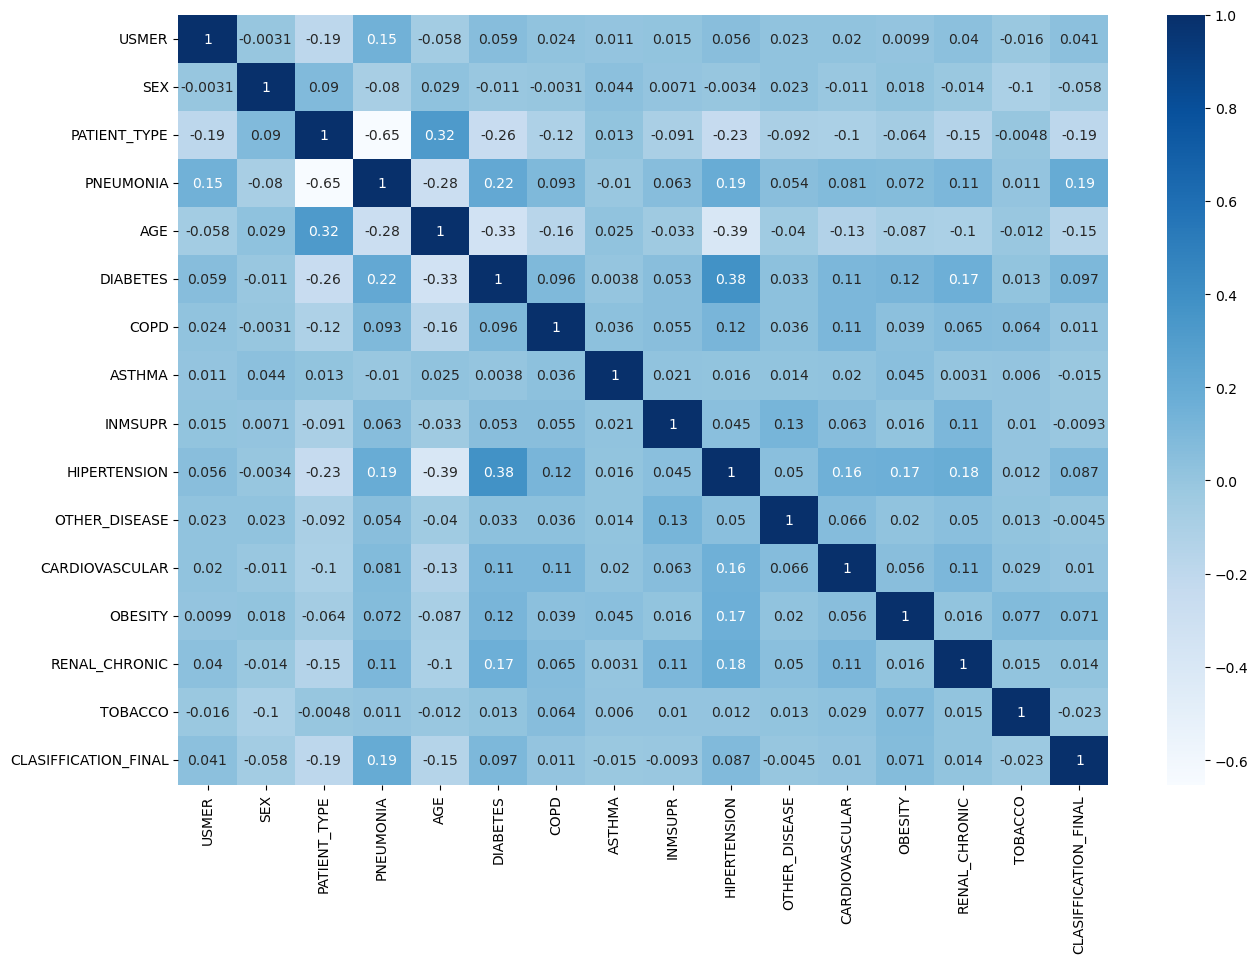

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(covid_df.corr(), annot=True, cmap='Blues')

In [63]:
# definindo as cores do gráfico
cores = plt.get_cmap('Accent').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

#### Para poupar tempo vou criar uma função com todas as personalizações que quero para gerar os gráficos para a análise

In [64]:
# função para facilitar a visualização dos gráficos
def grafico_barra(coluna):
    plt.figure(figsize=(15,10))
    indicie = list(coluna.value_counts().index)
    valores = list(coluna.value_counts())
    barra = plt.bar(indicie, valores)
    plt.bar_label(barra, labels=valores, padding=5, fontsize=12, fontweight='bold')
    plt.xticks(ticks=indicie)
    plt.tick_params(axis='both', length=0)
    plt.yticks([])
    plt.box(False)
    plt.title(f'Gráfico da coluna {coluna.name}', fontsize=14, fontweight='bold')
    
    
def calcluar_limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude


def excluir_outliers(df, coluna):
    qtd_linhas = df.shape[0]
    inf, sup = calcluar_limites(df[coluna])
    df = df.loc[(df[coluna] >= inf) & (df[coluna] <= sup), :]
    linhas_removidas = qtd_linhas - df.shape[0]
    return df, linhas_removidas
    
    
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(calcluar_limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

#### Para a coluna de idade, vamos precisar calcular os outliers, pois vamos ter vários valores que podem prejudicar nosso modelo

In [65]:
calcluar_limites(covid_df['AGE'])

(-4.5, 87.5)

- Tendo esses limites percebemos que perderemos os dados de pessoas com mais de 88 anos (pois, não temos 87.5 anos), como o covid é uma doença que afetou as pessoas mais idosas vou ver como estão os dados das pessoas com mais de 87 anos

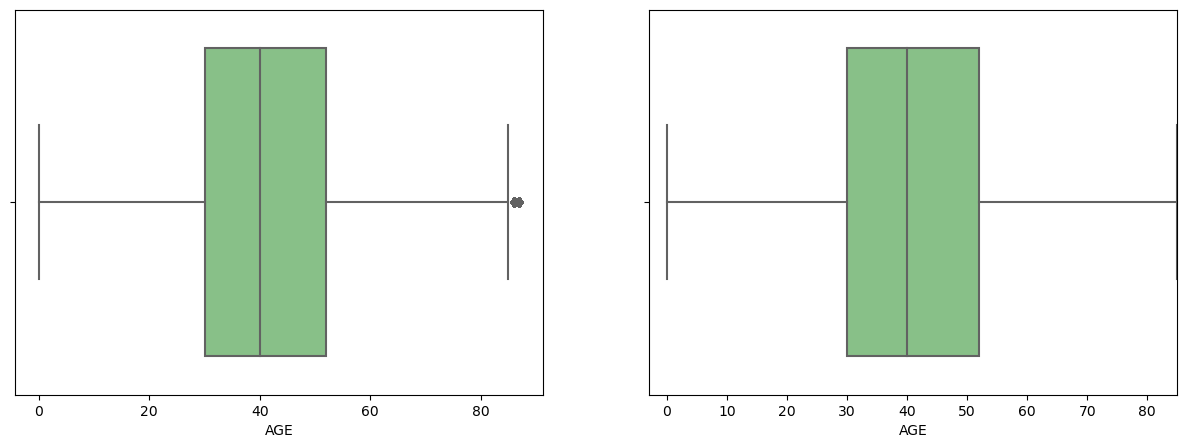

In [89]:
diagrama_caixa(covid_df['AGE'])

In [67]:
covid_df, linhas_removidas = excluir_outliers(covid_df, 'AGE')
print(f'{linhas_removidas} linhas removidas')

5334 linhas removidas


- Para as outras colunas, não precisarei calcular os outliers

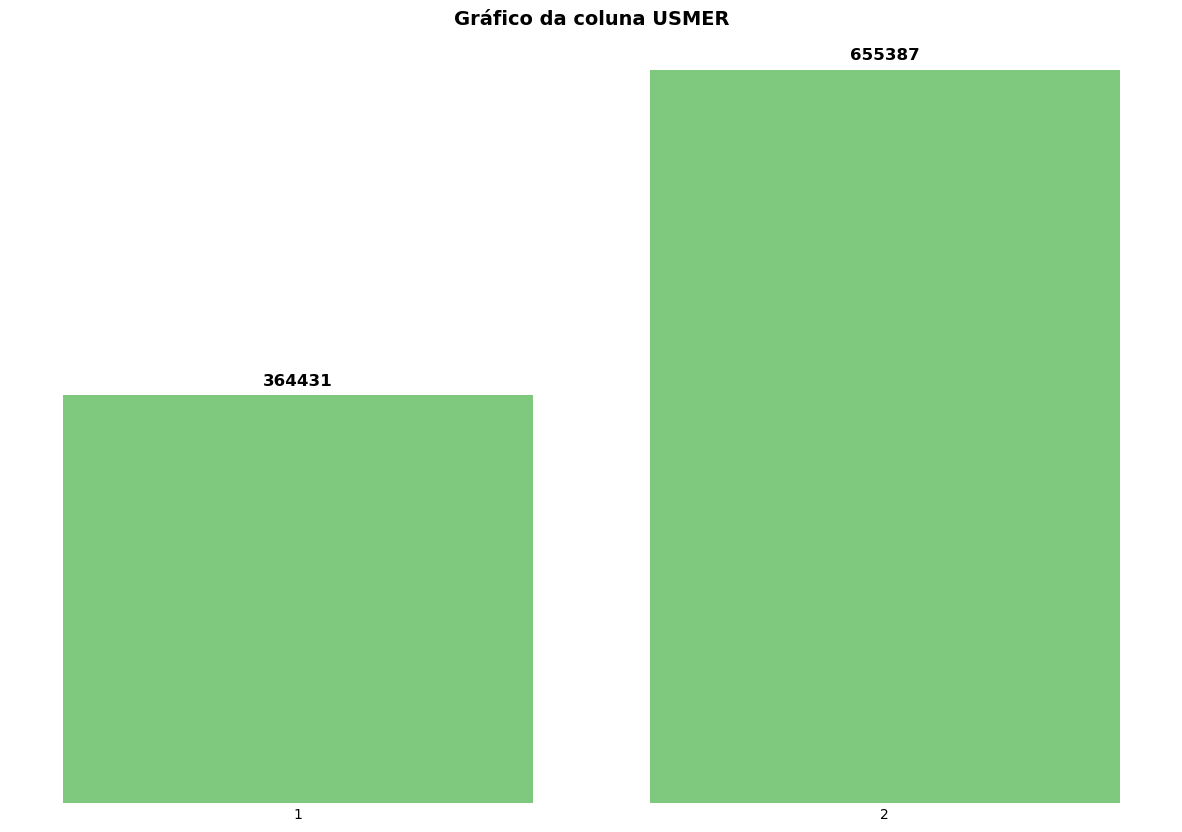

In [88]:
grafico_barra(covid_df['USMER'])

- Indica se o paciente atendeu unidades médicas de primeiro, segundo ou terceiro nível
- Percebemos que não houve casos de terceiro nível
- Temos quase o dobro de casos de segundo nível

Para fins explicativos o primeiro nível seria Unidades Básicas de Saúde (UBSs), nível secundário Unidades de Pronto Atendimento (UPAs) e terceiro nível hospitais de grande porte (alta complexidade).

Para saber mais sobre isso pode acessar o link: https://blog.apolo.app/como-funciona-o-sistema-de-saude-no-mexico/ ou https://mv.com.br/blog/niveis-de-atencao-a-saude-no-brasil

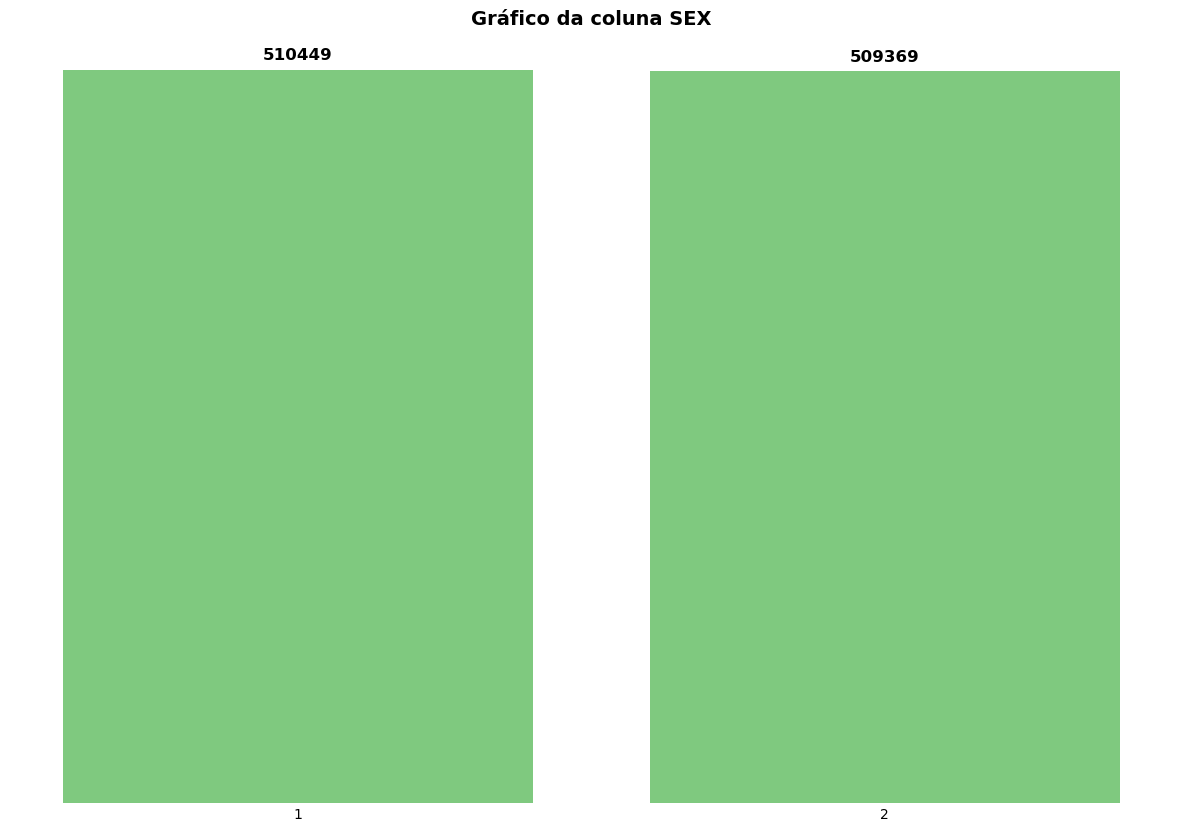

In [69]:
grafico_barra(covid_df['SEX'])

- 1 para mulher e 2 para homem
- Percebemos que os dados estão bem divididos, então já podemos ter uma noção que o covid pode ser contraido por ambos os sexos, então não me parece ser uma doença específica de gênero

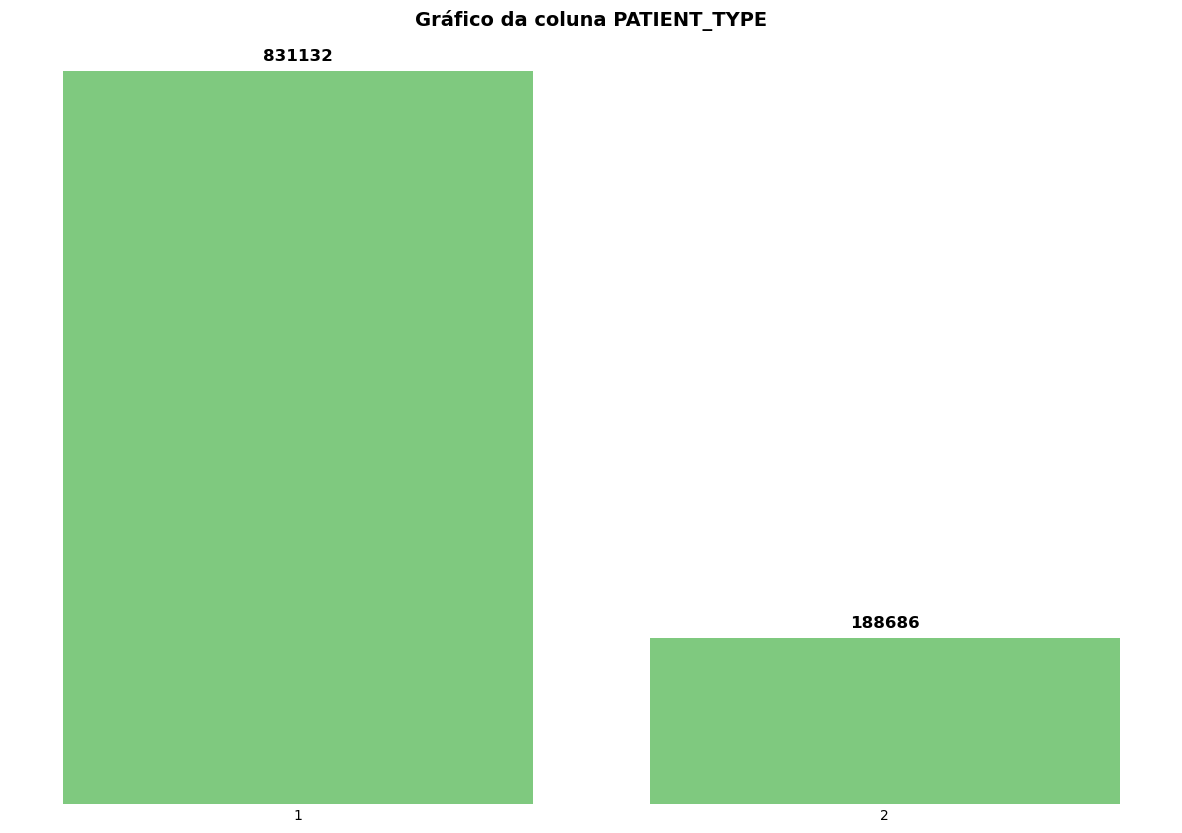

In [70]:
grafico_barra(covid_df['PATIENT_TYPE'])

- Tipo de atendimento que o paciente recebeu na unidade. 1 por retorno para casa e 2 por internação.
- Percebemos um número muito maior para casos que os pacientes voltaram para a casa e não precisaram de internação, então talvez essas pessoas não eram um caso grave do covid

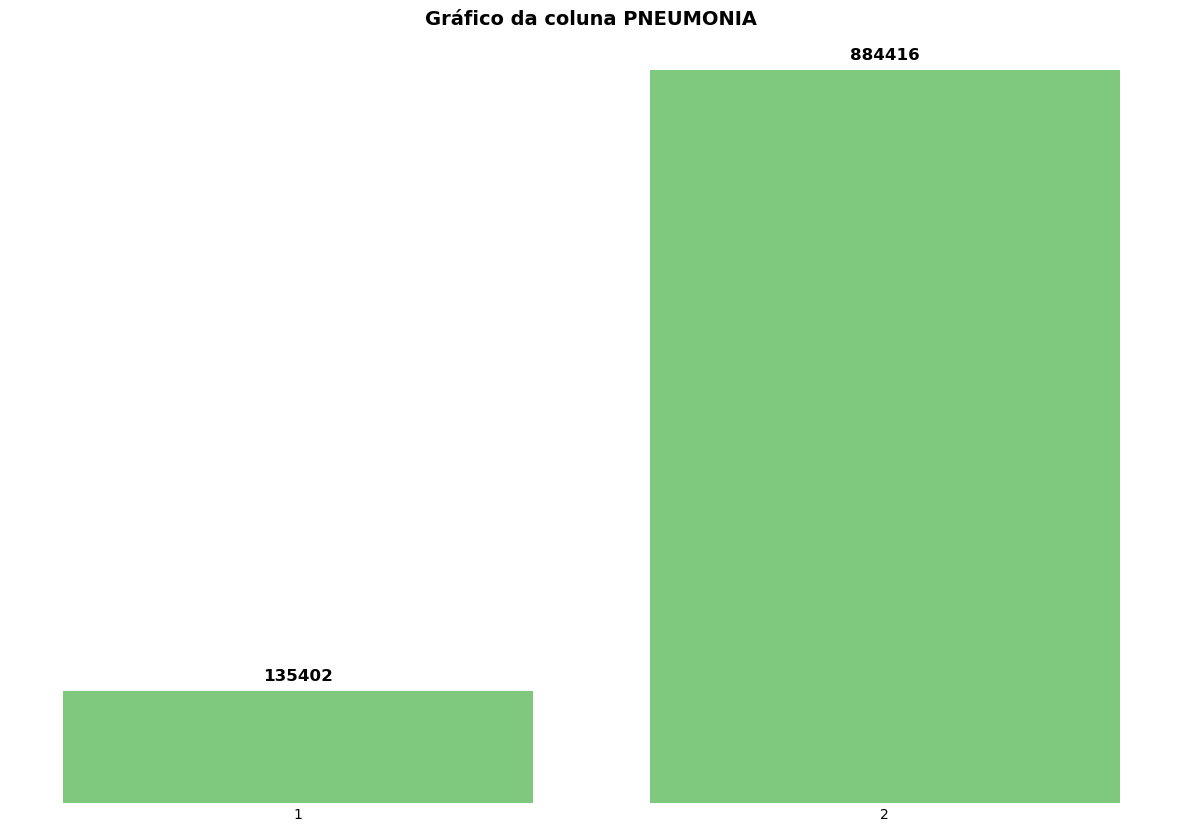

In [71]:
grafico_barra(covid_df['PNEUMONIA'])

- Se o paciente já tem inflamação nos sacos de ar ou não. Sendo 1 'Sim' e 2 'Não'

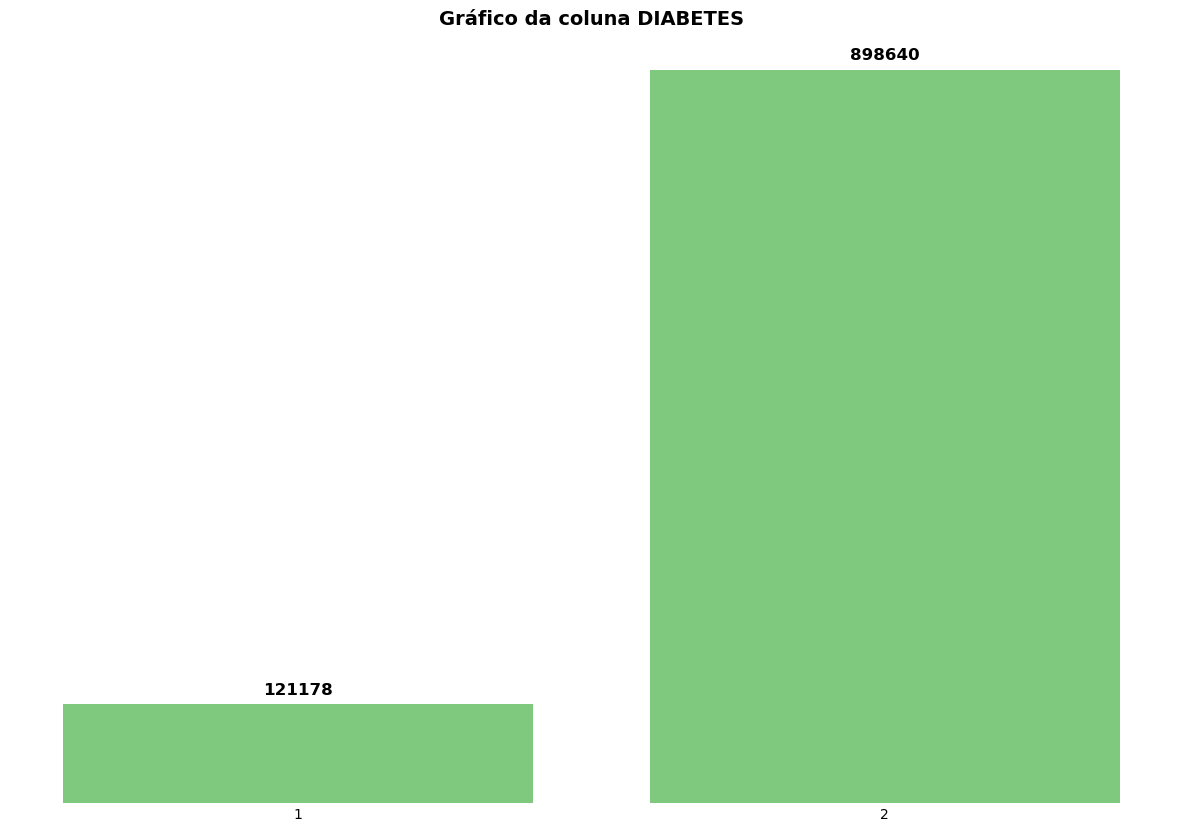

In [72]:
grafico_barra(covid_df['DIABETES'])

- Se o paciente tem diabetes ou não. Sendo 1 'Sim' e 2 'Não'

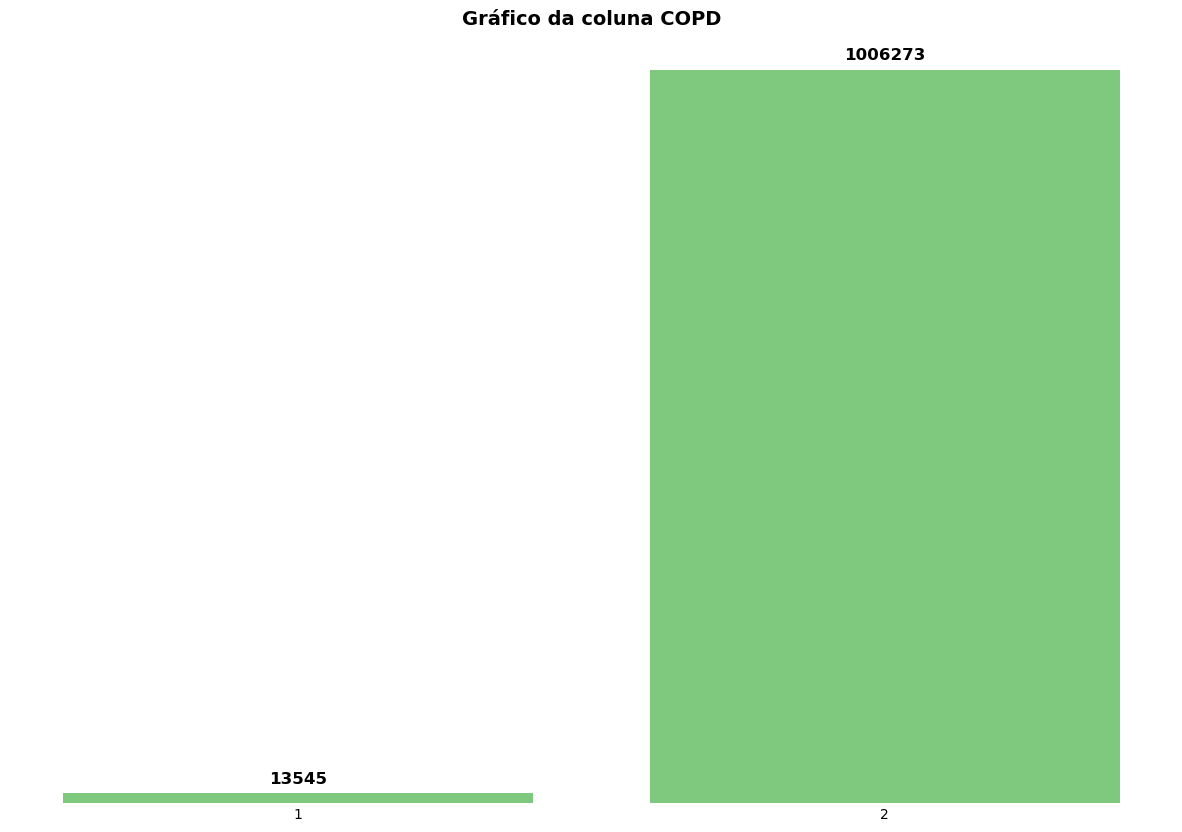

In [73]:
grafico_barra(covid_df['COPD'])

- Indica se o paciente tem Doença Pulmonar Obstrutiva Crônica ou não. Sendo 1 'Sim' e 2 'Não'

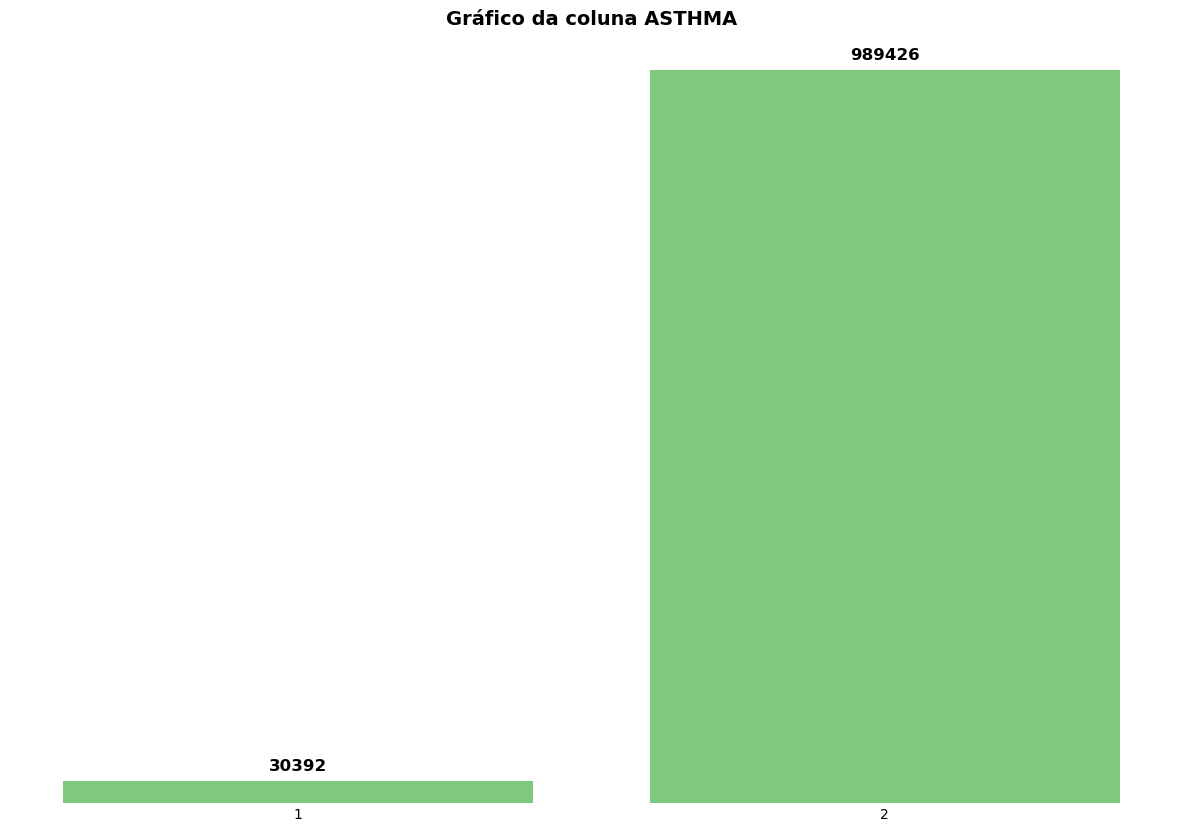

In [74]:
grafico_barra(covid_df['ASTHMA'])

- Se o paciente tem asma ou não. Sendo 1 'Sim' e 2 'Não'

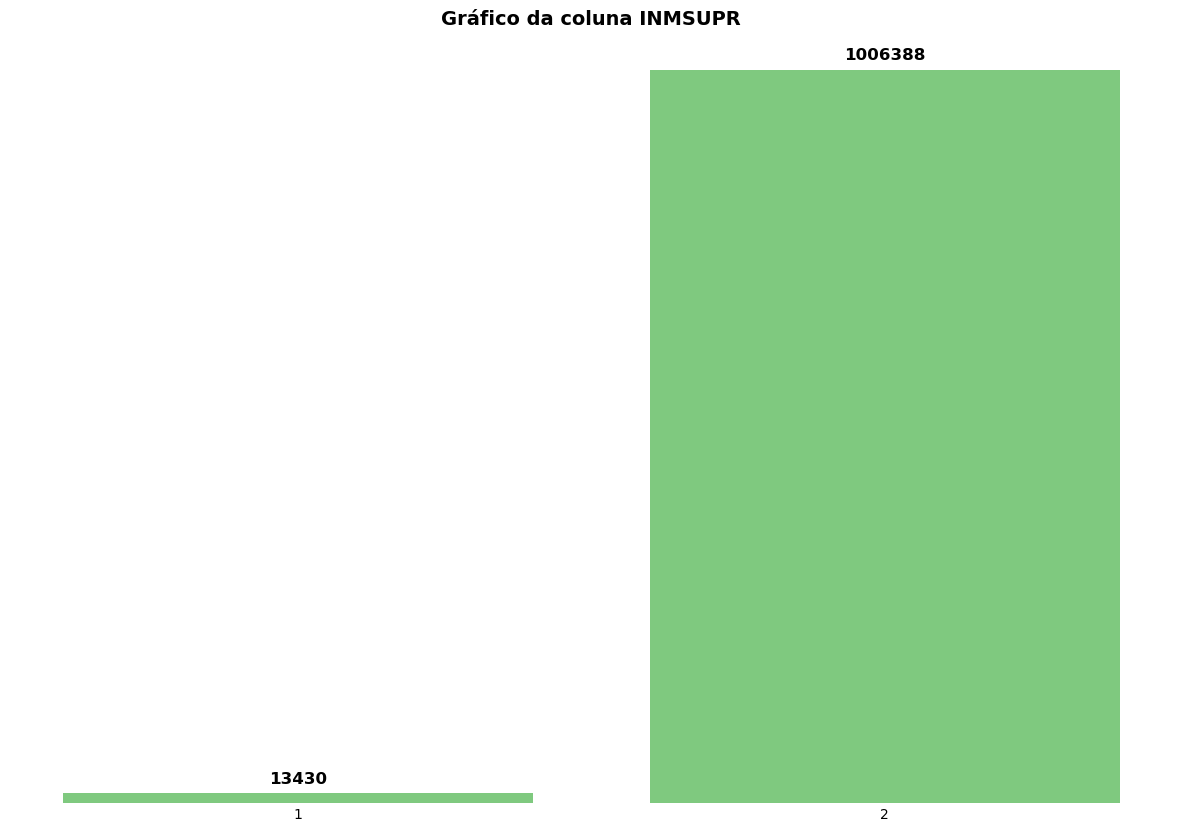

In [75]:
grafico_barra(covid_df['INMSUPR'])

- Imunossupressão: Se o paciente é imunossuprimido ou não.
- Explicação: Uma pessoa imunossuprimida é alguém cujo sistema imunológico está enfraquecido ou suprimido. Isso pode ser devido a várias razões, incluindo doenças, tratamentos médicos ou condições médicas subjacentes. Quando alguém é imunossuprimido, seu corpo tem dificuldade em combater infecções e doenças de forma eficaz.

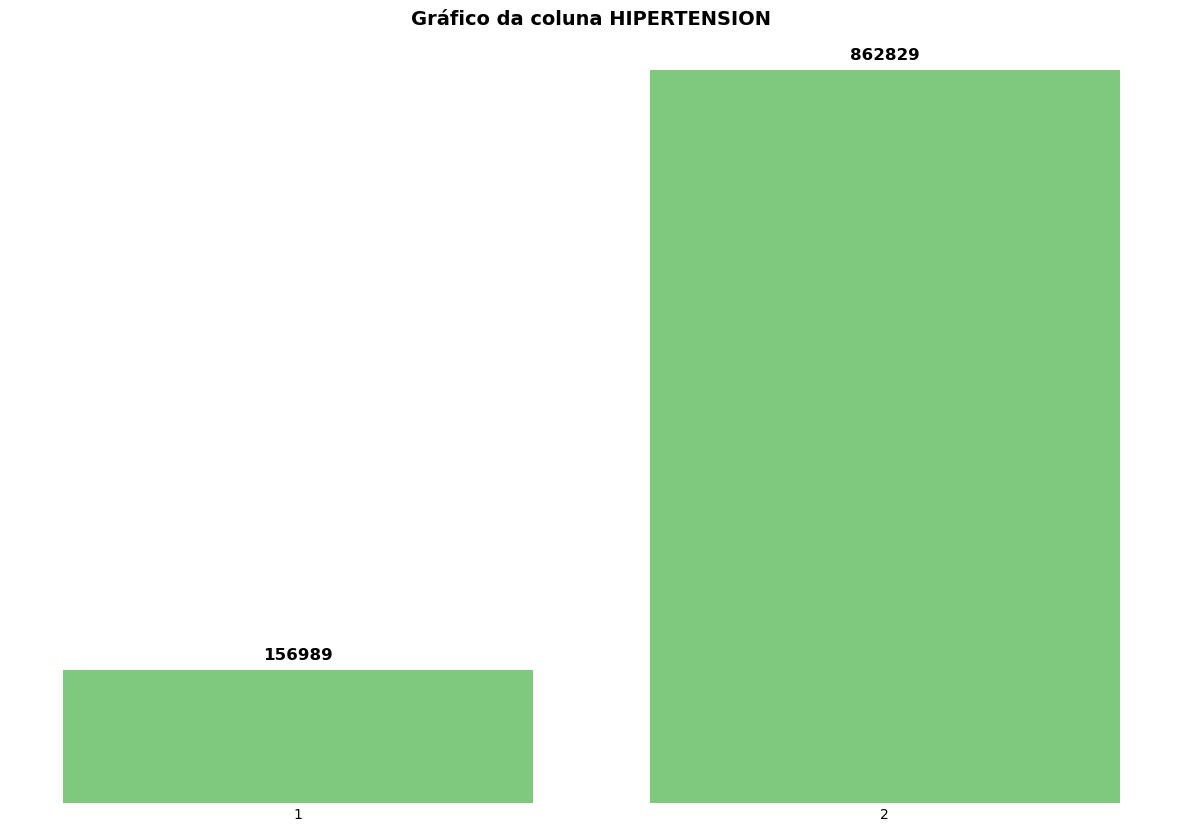

In [76]:
grafico_barra(covid_df['HIPERTENSION'])

- Se o paciente tem hipertensão ou não. Sendo 1 'Sim' e 2 'Não'

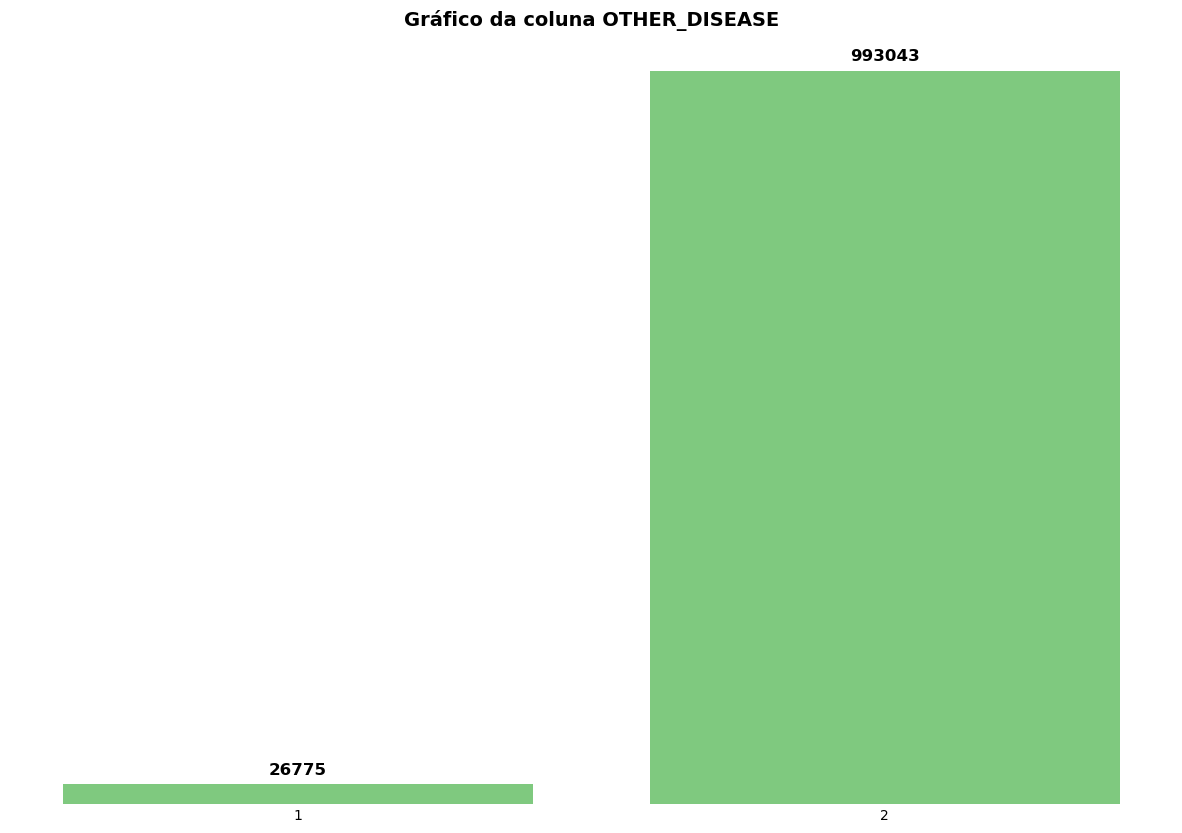

In [77]:
grafico_barra(covid_df['OTHER_DISEASE'])

- Se o paciente tem outras doenças ou não. Sendo 1 'Sim' e 2 'Não'

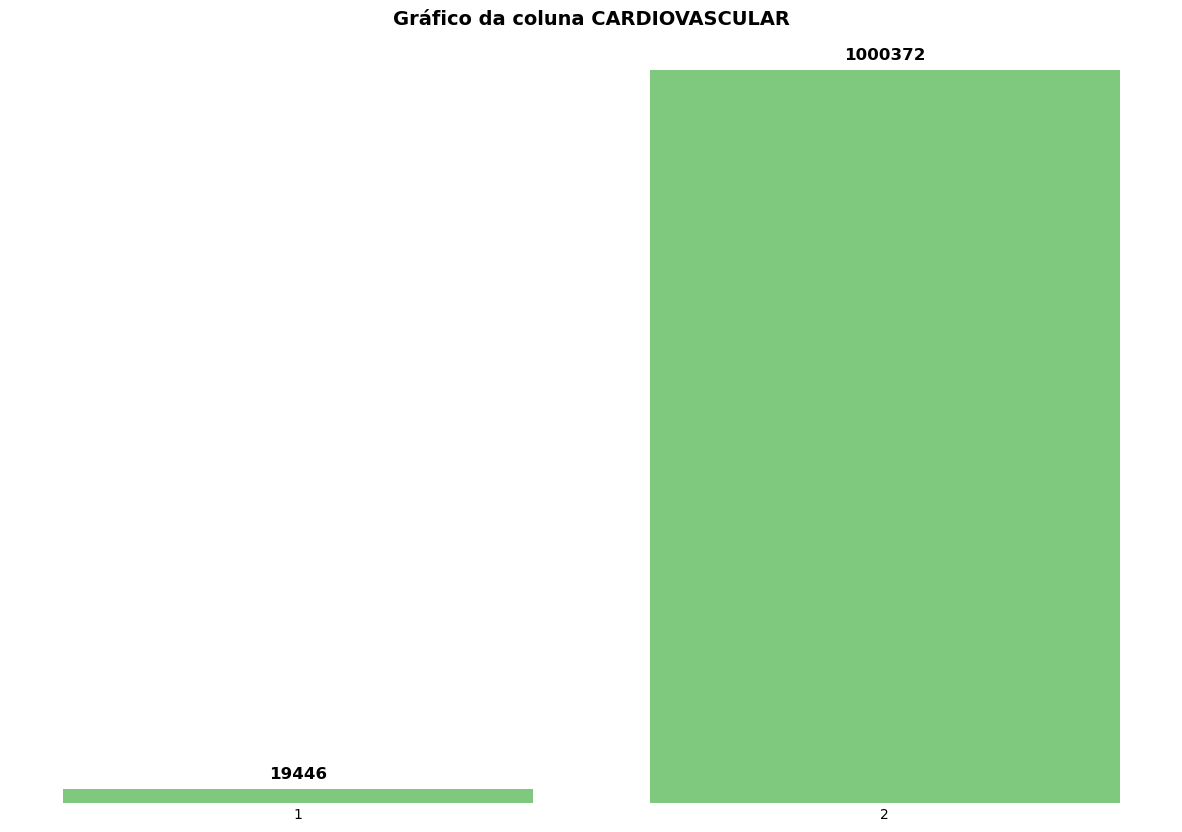

In [78]:
grafico_barra(covid_df['CARDIOVASCULAR'])

- Se o paciente tem doença cardíaca ou relacionada a vasos sanguíneos. Sendo 1 'Sim' e 2 'Não'

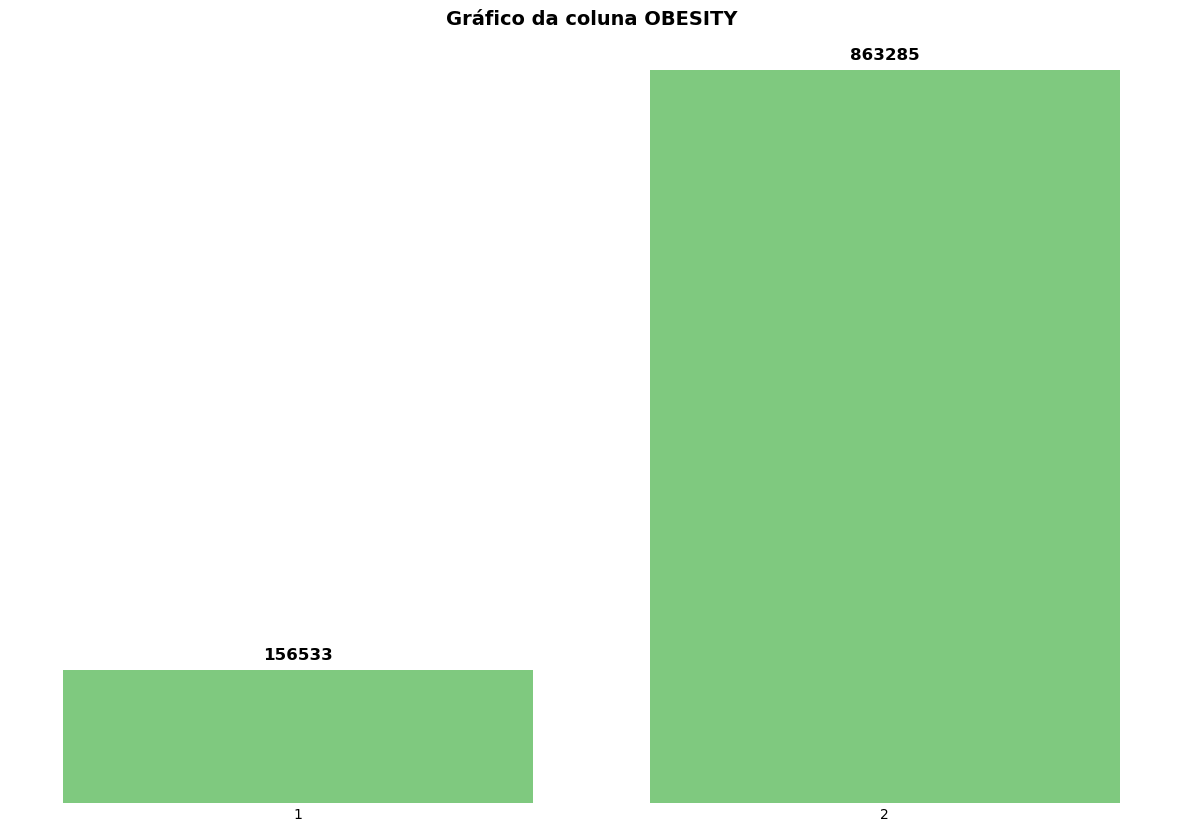

In [79]:
grafico_barra(covid_df['OBESITY'])

- Se o paciente é obeso ou não. Sendo 1 'Sim' e 2 'Não'

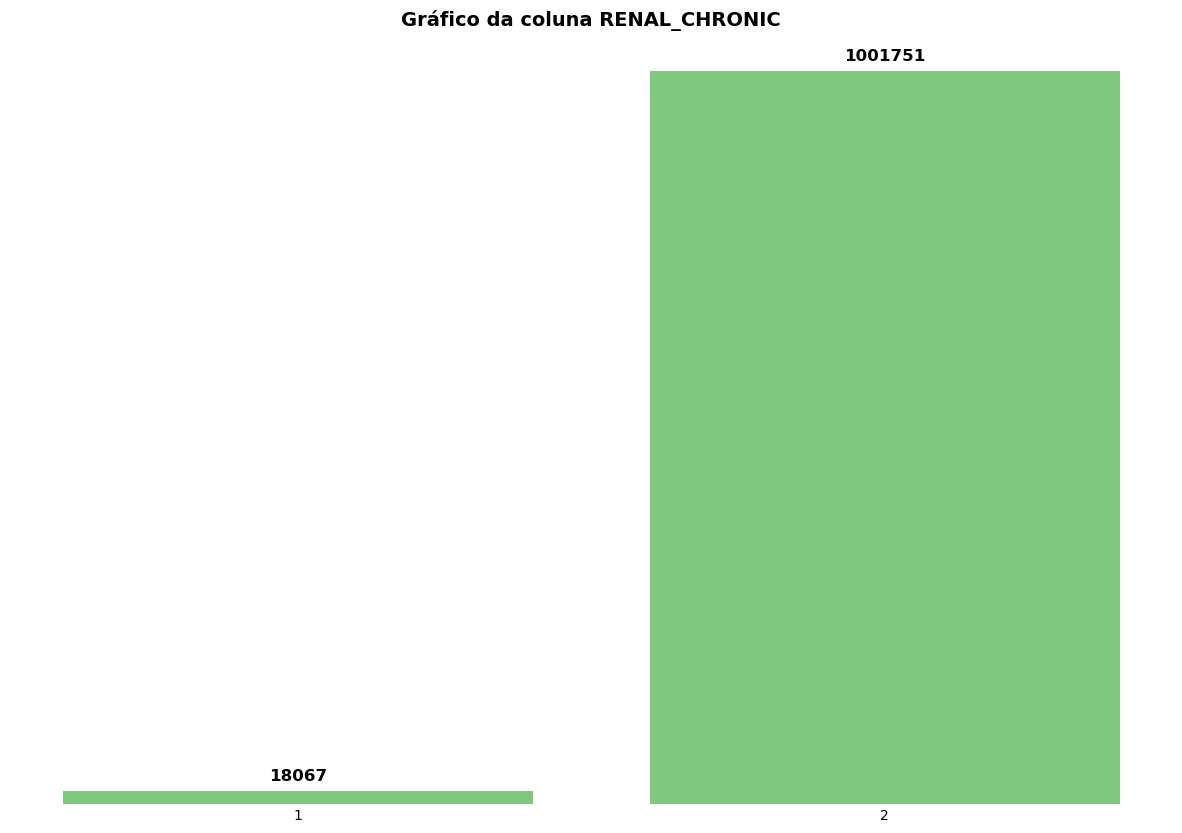

In [80]:
grafico_barra(covid_df['RENAL_CHRONIC'])

- Se o paciente tem doença renal crônica ou não. Sendo 1 'Sim' e 2 'Não'

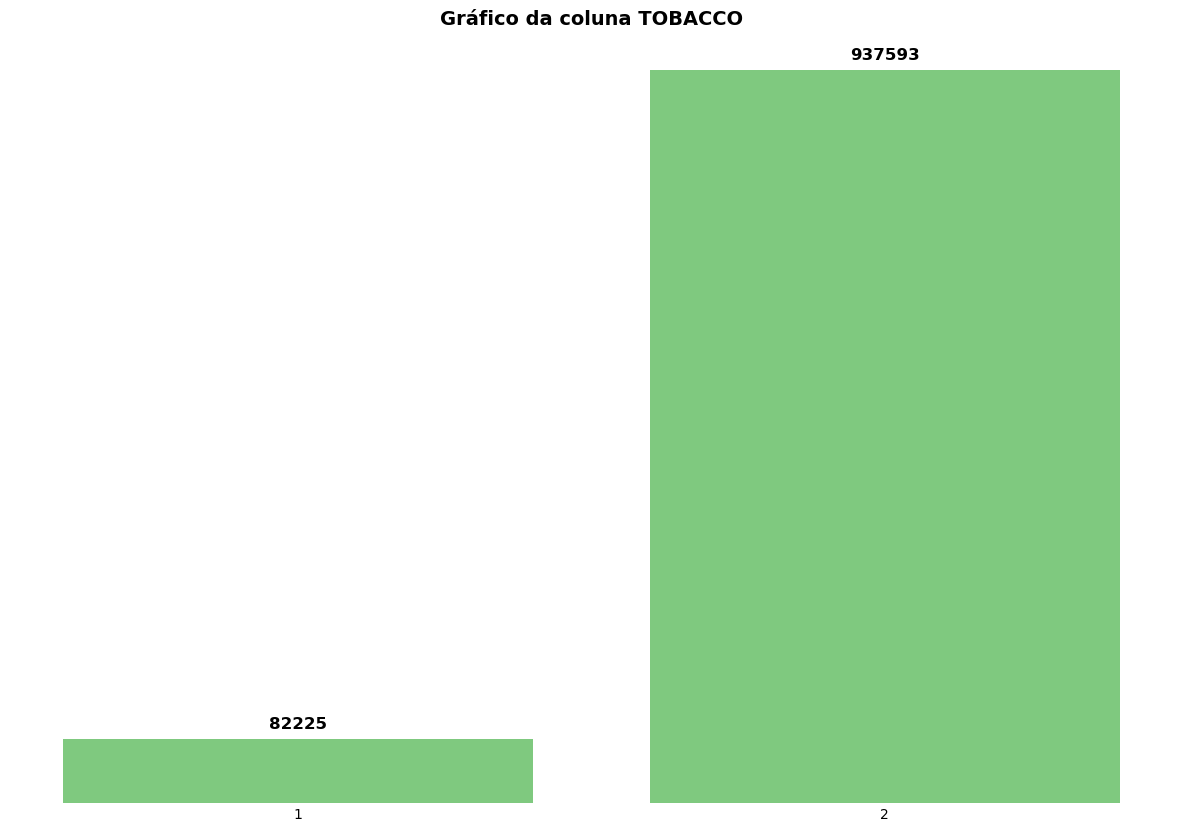

In [81]:
grafico_barra(covid_df['TOBACCO'])

- Se o paciente é usuário de tabaco ou não. Sendo 1 'Sim' e 2 'Não'

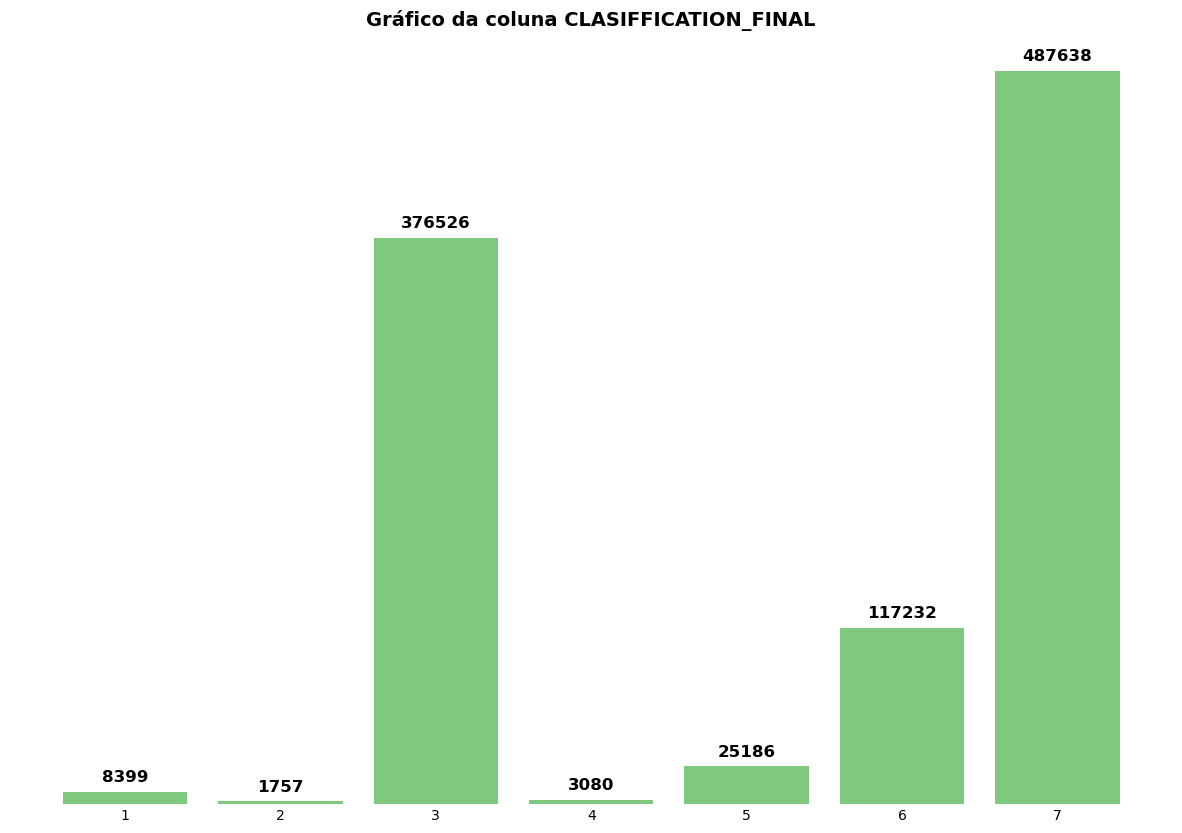

In [82]:
grafico_barra(covid_df['CLASIFFICATION_FINAL'])

- Resultados do teste de COVID. Valores de 1 a 3 significam que o paciente foi diagnosticado com COVID em diferentes graus. 4 ou mais alto significa que o paciente não é portador de COVID ou que o teste é inconclusivo.
- Tendo essa informação, todos que forem maior que 3 vou agrupar em um grupo apenas

In [83]:
agrupar = [4, 5, 6, 7]
for tipo in agrupar:
    covid_df.loc[covid_df['CLASIFFICATION_FINAL']==tipo, 'CLASIFFICATION_FINAL'] = 4

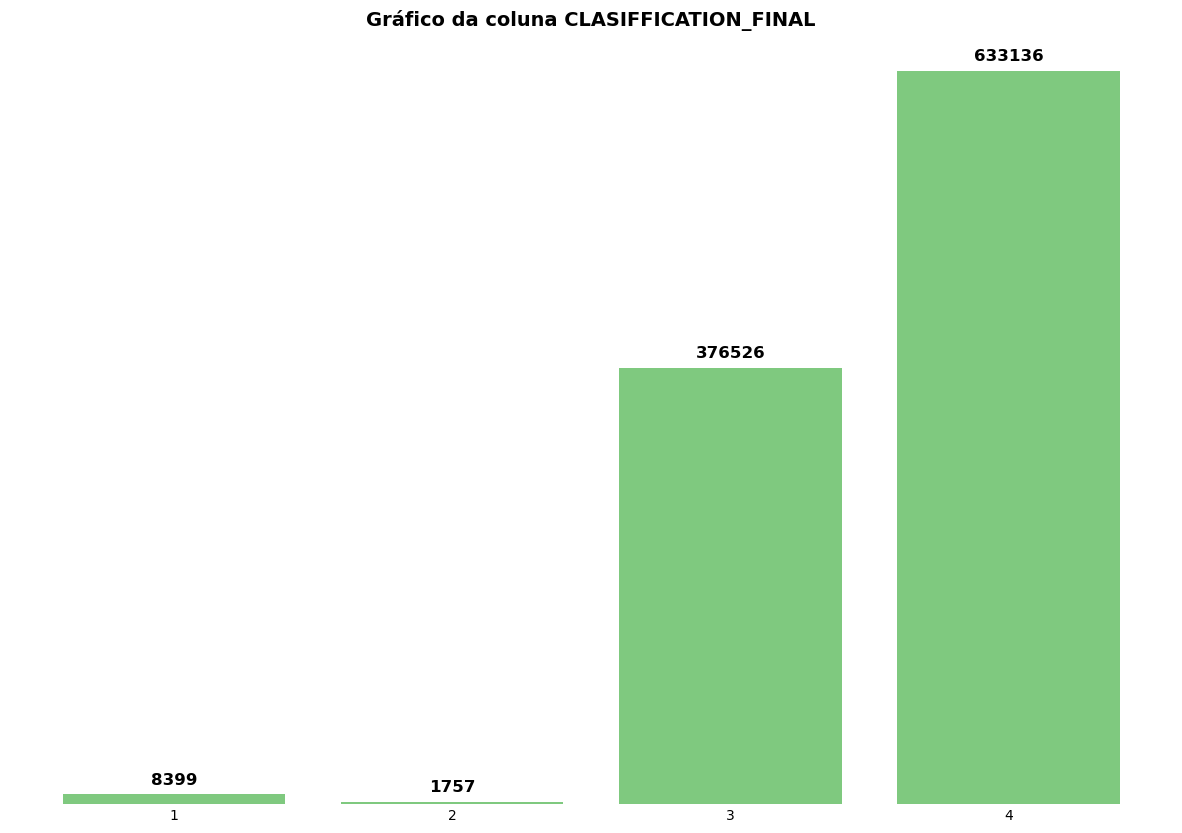

In [84]:
grafico_barra(covid_df['CLASIFFICATION_FINAL'])